# MovieNow: An online movie rental company
For this project, we are working with a database from a fictional movie rental company called MovieNow which offers an online platform for streaming movies. Customers can rent a movie for 24 hours. For all movies, the company stores additional information such as the genre of the main actors, also information about customers and movie ratings.

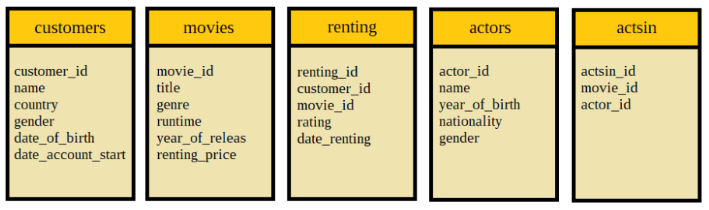

### KPIs
* **Revenue:** Revenue is a trivial indicator if success, for MovieNow this is calculated as the sum of the price for rented movies.
* **Customer satisfaction:** This could be quantified by the average rating of all movies.
* **Customer engagement:** Number of active customers in a certain time period.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sqlite3

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Lista de archivos CSV que quieres convertir
raiz  = '/kaggle/input/movienow/'
archivos_csv = ['actors_data.csv', 'actsin_data.csv', 'customers_data.csv', 'movies_data.csv', 'renting_data.csv']

# Conectarse a la base de datos SQLite
conn = sqlite3.connect(':memory:')

# Iterar sobre los archivos CSV
for archivo_csv in archivos_csv:
    # Leer el archivo CSV en un DataFrame de pandas
    df = pd.read_csv(f"{raiz}{archivo_csv}")

    # Obtener el nombre de la tabla a partir del nombre del archivo (sin extensión)
    nombre_tabla = os.path.splitext(archivo_csv)[0]

    # Guardar el DataFrame en la base de datos como una tabla
    df.to_sql(nombre_tabla, conn, index=False, if_exists='replace')

## 1. Examining annual rentals
You are asked to provide a report about the development of the company. Specifically, your manager is interested in the total number of movie rentals, the total number of ratings and the average rating of all movies since the beginning of 2019.

In [ ]:
consulta_sql = """SELECT 
    COUNT(renting_id) AS number_renting,
    AVG(rating) AS average_rating, 
    COUNT(rating) AS number_ratings -- Add the total number of ratings here.
FROM renting_data
WHERE date_renting >= '2019-01-01';"""
resultado = pd.read_sql_query(consulta_sql, conn)

print(resultado)

## 2. Average movie ratings
For each movie the average rating, the number of ratings and the number of views has to be reported. Generate a table with meaningful column names.

In [ ]:
consulta_sql = """SELECT movie_id, 
       AVG(rating) AS avg_rating,
       COUNT(rating) AS number_ratings,
       COUNT(*) AS number_renting
FROM renting_data
GROUP BY movie_id
ORDER BY avg_rating DESC;"""
resultado = pd.read_sql_query(consulta_sql, conn)

print(resultado)

## 3. Average rating per customer
Obtain a table with the average rating given by each customer. You will include the number of ratings and the number of movie rentals per customer and you will report these summary statistics only for customers with more than 7 movie rentals and order them in ascending order by the average rating.

In [ ]:
consulta_sql = """SELECT customer_id,
       AVG(rating),
       COUNT(rating),
       COUNT(*)
FROM renting_data
GROUP BY customer_id
HAVING COUNT(*) > 7
ORDER BY AVG(rating);"""
resultado = pd.read_sql_query(consulta_sql, conn)

print(resultado)


In [ ]:
# Cerrar la conexión a la base de datos
#conn.close()